FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('fashionmnist/fashion-mnist_train.csv')

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

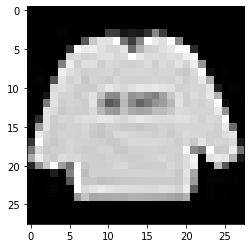

In [16]:
# Imprimindo um objeto do dataset
plt.imshow(data.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

### Importações

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import utils.mnist_reader as mnist_reader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Dividindo o conjunto de dados

In [5]:
X_train, y_train = mnist_reader.load_mnist('data', kind='train')
X_test, y_test = mnist_reader.load_mnist('data', kind='t10k')

(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train,
test_size=0.1, stratify=y_train ,random_state=84)

### Normalização

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Treinando variando o K e a função de distância

In [8]:
distancias = ['euclidean', 'chebyshev', 'manhattan']
finalResult = []
kValues = range(1, 30, 2)

def toTrain(distance, kValues):
    result = []

    for k in kValues:
        # Treinando o modelo:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        knn.fit(X_train, y_train)
        # Avaliando o modelo:
        score = knn.score(X_val, y_val)
        result.append(score)

    return result

In [9]:
finalResult.append(toTrain(distancias[0], kValues))

In [10]:
finalResult.append(toTrain(distancias[1], kValues))

In [11]:
finalResult.append(toTrain(distancias[2], kValues))

### Resultado para a função de distância Euclidiana 

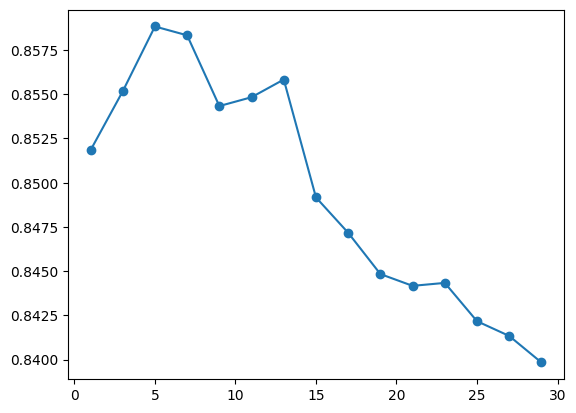

In [12]:
plt.plot(kValues, finalResult[0], marker='o')
plt.show()

In [29]:
print("k = %d | Maior acurácia = %.2f%%" % (kValues[np.argmax(finalResult[0])], max(finalResult[0]) * 100))

k = 5 | Maior acurácia = 85.88%


### Resultado para a função de distância Chebyshev 

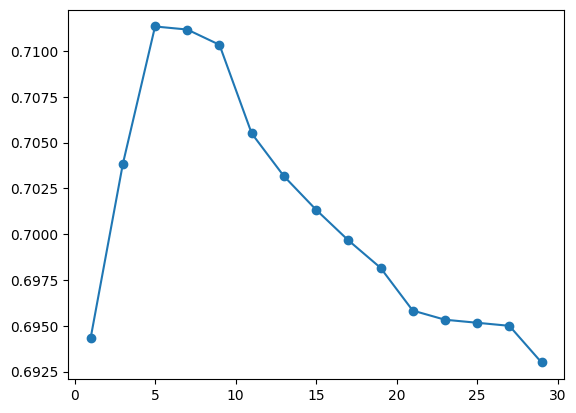

In [14]:
plt.plot(kValues, finalResult[1], marker='o')
plt.show()

In [28]:
print("k = %d | Maior acurácia = %.2f%%" % (kValues[np.argmax(finalResult[1])], max(finalResult[1]) * 100))

k = 5 | Maior acurácia = 71.13%


### Resultado para a função de distância Manhattan 


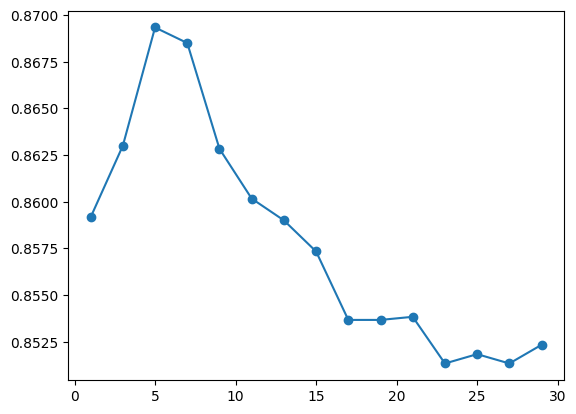

In [16]:
plt.plot(kValues, finalResult[2], marker='o')
plt.show()

In [26]:
print("k = %d | Maior acurácia = %.2f%%" % (kValues[np.argmax(finalResult[2])], max(finalResult[2]) * 100))

k = 5 | Maior acurácia = 86.93%


### Escolhendo o melhor valor de K e distância - Conjutno de validação

O melhor resultado obtido foi utilizando a função distância **Manhattan** com o valor de **k = 5**.

### Treinamento e aplicação no conjunto de teste

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)
resultadoKnn = knn.predict(X_test)

### Avaliando acurácia do método

In [35]:
acuracia = accuracy_score(y_test, resultadoKnn)
print("Acurácia do método = %.2f%%" % (acuracia * 100))

Acurácia do método = 85.83%
